Bonhoure Timothé et Martinez Christophe

# GNN : Projet

## 1ère partie

In [1]:
#import

import torch
from torch_geometric.utils import from_networkx, train_test_split_edges
from torch_geometric.transforms import RandomLinkSplit
from torch_geometric.nn import VGAE, GAE
import networkx as nx
from sklearn.preprocessing import LabelEncoder

from GCN import GCN
from encoder import Encoder
from decoder import Decoder

from sklearn.metrics import confusion_matrix
import seaborn as sns

import pandas as pd
from matplotlib import pyplot as plt
import time

from itertools import combinations
import copy
import numpy as np

from multiprocessing import Pool
from tqdm import tqdm

# device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
device = torch.device("cpu")
%load_ext autoreload
from IPython.display import clear_output

In [27]:
# Load the network
G = nx.read_graphml("data/airportsAndCoordAndPop.graphml")

[]

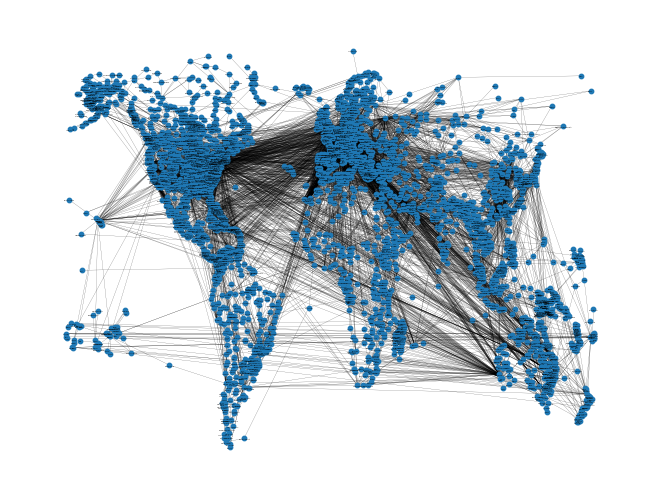

In [28]:
node_positions = {node: (data['lon'], data['lat']) for node, data in G.nodes(data=True)}
labels = {node: (data['city_name']) for node, data in G.nodes(data=True)}
nx.draw_networkx_edges
nx.draw(G, pos=node_positions, with_labels=True, labels=labels, font_size=1, node_size=10, width = 0.1)
plt.plot()

In [29]:
G.graph = {} 
encoder = LabelEncoder()
encoder.fit([G.nodes[node]["country"] for node in G.nodes])

for node in G.nodes :
    G.nodes[node]["country_code"] = encoder.transform([G.nodes[node]["country"]])[0]


data = from_networkx(G, group_node_attrs=["lon","lat","country_code"])

## Test du Dropout

In [30]:
%autoreload 2
from test_dropout import fit, test_dropout

In [ ]:
dt = data.__copy__()
train_test_split_edges(dt)
dt.num_classes = len(set(data.country))

0it [00:00, ?it/s]

Dropout :  0.0
Dropout :  0.0
Dropout :  0.0
Dropout :  0.0
0.0;0.9645429374968636;0.9650137714231042;2000;115.00984334945679
Dropout :  0.5
0.0;0.9525722788651819;0.9451127303609325;2000;115.22103786468506
Dropout :  0.5
0.0;0.9635992922114901;0.96304353186936;2000;115.78753709793091
Dropout :  0.5
0.0;0.8457279050638297;0.7693151868853602;2000;115.87400889396667
Dropout :  0.5


1it [03:45, 225.83s/it]

0.5;0.9042939133242714;0.9128579072133781;2000;108.88167572021484
0.5;0.9435400116510192;0.9386323736973763;2000;108.16670203208923
Dropout :  0.0
Dropout :  0.0


3it [03:46, 58.78s/it] 

0.5;0.92666567029361;0.9289538702773197;2000;109.32172203063965
Dropout :  0.0


4it [03:47, 38.82s/it]

0.5;0.9357203013555765;0.9371728127783838;2000;109.77589988708496
Dropout :  0.0
0.0;0.9148542858950666;0.8964611051270036;2000;106.74591994285583
Dropout :  0.5
0.0;0.8319373201346629;0.7571393711568124;2000;107.05663204193115
Dropout :  0.5
0.0;0.9672211446362765;0.9712065315628376;2000;107.3509612083435
Dropout :  0.5
0.0;0.9650725788680183;0.9636851316333519;2000;107.3881208896637
Dropout :  0.5


6it [07:22, 65.90s/it]

0.5;0.9453689380335959;0.9425202269372506;2000;109.17446684837341
Dropout :  0.0
0.5;0.909590054305968;0.9028254696940341;2000;109.54156303405762
Dropout :  0.0


7it [07:23, 45.66s/it]

0.5;0.9544568421374167;0.9573184928127696;2000;109.86666798591614
Dropout :  0.0


8it [07:25, 32.01s/it]

0.5;0.9457292141671158;0.937750736256898;2000;110.34176588058472
Dropout :  0.0
0.0;0.9656273113854896;0.9660382373397158;2000;106.58318185806274
Dropout :  0.5
0.0;0.9063429326968182;0.8836771693406013;2000;107.06238508224487
Dropout :  0.5
0.0;0.8831033493407574;0.818653245357923;2000;106.66688680648804
Dropout :  0.5
0.0;0.9558139458773064;0.9402773890236881;2000;107.55387926101685
Dropout :  0.5


9it [11:04, 89.42s/it]

0.5;0.8835118986579511;0.8916023859399889;2000;115.63781785964966
Dropout :  0.0


10it [11:05, 62.57s/it]

0.5;0.8321435039022187;0.7585170552261641;2000;116.35701870918274
Dropout :  0.0


11it [11:06, 43.92s/it]

0.5;0.9499267993079208;0.9506434728256815;2000;116.29630327224731
Dropout :  0.0


12it [11:10, 31.65s/it]

0.5;0.9225638133305989;0.9191910016857113;2000;117.1678249835968
Dropout :  0.0
0.0;0.8680369341673776;0.7991836726007622;2000;109.41977882385254
Dropout :  0.5
0.0;0.7662339716666413;0.6856404978728011;2000;109.7661600112915
Dropout :  0.5
0.0;0.965567856277914;0.9661761333792166;2000;110.15069270133972
Dropout :  0.5
0.0;0.9682498816352447;0.968280241985102;2000;110.52961492538452
Dropout :  0.5


13it [14:43, 86.46s/it]

0.5;0.94127471750642;0.9440782830429816;2000;109.55902314186096
Dropout :  0.0


14it [14:44, 60.76s/it]

0.5;0.8763183761010103;0.827221157175632;2000;109.02367496490479
Dropout :  0.0


15it [14:45, 42.68s/it]

0.5;0.9118081661862985;0.9092766458279502;2000;108.2150399684906
Dropout :  0.0


16it [14:51, 31.68s/it]

0.5;0.8675495659231688;0.8888563213857932;2000;110.55715203285217
Dropout :  0.0
0.0;0.9497238882985802;0.934805339486158;2000;114.2435519695282
Dropout :  0.5
0.0;0.7342839423209092;0.6569878656736331;2000;114.1123309135437
Dropout :  0.5
0.0;0.9564425881844701;0.9546540526476632;2000;115.32616901397705
Dropout :  0.5
0.0;0.8021754023856225;0.7246105608265503;2000;115.69274497032166
Dropout :  0.5


17it [18:33, 88.78s/it]

0.5;0.9420170881615607;0.9423356065170413;2000;115.24248003959656
Dropout :  0.0


18it [18:34, 62.44s/it]

0.5;0.9119925315657529;0.9220549759963165;2000;115.30563592910767
Dropout :  0.0


19it [18:36, 44.24s/it]

0.5;0.9393252445295845;0.9253837433997989;2000;115.24130201339722
Dropout :  0.0


20it [18:44, 33.45s/it]

0.5;0.900229147621032;0.9096100516394187;2000;117.10919785499573
Dropout :  0.0
0.0;0.9387347844015979;0.9332837072793267;2000;110.44706726074219
Dropout :  0.5
0.0;0.9544453874836635;0.9462880441489779;2000;110.39421582221985
Dropout :  0.5
0.0;0.8711856003002212;0.8055795059511441;2000;110.24349594116211
Dropout :  0.5
0.0;0.9678225139583136;0.9650211344268315;2000;108.736732006073
Dropout :  0.5


21it [22:21, 88.57s/it]

0.5;0.879098584204796;0.8813833888088187;2000;117.72304010391235
Dropout :  0.0


22it [22:23, 62.44s/it]

0.5;0.9361523054399786;0.9298826204891467;2000;118.1775290966034
Dropout :  0.0


23it [22:25, 44.30s/it]

0.5;0.9325920899615777;0.9296265333359283;2000;118.50473380088806
Dropout :  0.0


24it [22:31, 33.05s/it]

0.5;0.9324611796329709;0.9260365332049667;2000;118.5289831161499
Dropout :  0.0
0.0;0.9560989485718774;0.9590748602392579;2000;110.5894558429718
Dropout :  0.5
0.0;0.9574830525670425;0.9599623467398986;2000;113.7771589756012
Dropout :  0.5
0.0;0.9570892306618172;0.9591838036704476;2000;115.08064103126526
Dropout :  0.5
0.0;0.9657718582066595;0.9659870235352961;2000;115.45108103752136
Dropout :  0.5


25it [26:10, 88.64s/it]

0.5;0.9265396691023262;0.9259595667433711;2000;116.38588881492615
Dropout :  0.0


26it [26:11, 62.38s/it]

0.5;0.9447782051757583;0.9443808096464862;2000;115.79372501373291
Dropout :  0.0


27it [26:16, 45.16s/it]

0.5;0.9190256889701502;0.9169089580918115;2000;116.01335406303406
Dropout :  0.0


28it [26:22, 33.52s/it]

0.5;0.9335908266769067;0.9164567690728508;2000;115.20792603492737
Dropout :  0.0
0.0;0.9663844094525984;0.9639068548596061;2000;111.9565167427063
Dropout :  0.5
0.0;0.7785869975497951;0.6958617590730983;2000;111.43745517730713
Dropout :  0.5
0.0;0.9201321539767285;0.8926377301121016;2000;112.569087266922
Dropout :  0.5
0.0;0.7075495986507508;0.6316231654319256;2000;112.68377304077148
Dropout :  0.5


30it [29:55, 61.19s/it]

0.5;0.9337348280383742;0.9320466839690504;2000;113.38384771347046
0.5;0.9531193749468176;0.9525165383046346;2000;112.89309906959534
Dropout :  0.0
Dropout :  0.0


31it [30:01, 44.61s/it]

0.5;0.9417399946326767;0.9428407152934783;2000;112.69494104385376
Dropout :  0.0


32it [30:08, 33.13s/it]

0.5;0.9389576046900807;0.9389561829316873;2000;112.56652688980103
Dropout :  0.0
0.0;0.8724764306862537;0.8333862991696559;2000;103.51362776756287
Dropout :  0.5
0.0;0.9491293372228248;0.9445149534064817;2000;111.23162913322449
Dropout :  0.5
0.0;0.7306039984378034;0.6538930034255552;2000;109.85157012939453
Dropout :  0.5
0.0;0.8911630619053126;0.8355683566313973;2000;111.35155606269836
Dropout :  0.5


33it [33:30, 83.99s/it]

0.5;0.941685721392275;0.9443777926989196;2000;111.3678810596466
Dropout :  0.0


34it [33:38, 60.99s/it]

0.5;0.9222419921061071;0.9229749807455317;2000;110.8526918888092
Dropout :  0.0


35it [33:42, 44.13s/it]

0.5;0.9027437168496866;0.903917784371313;2000;111.11567783355713
Dropout :  0.0


36it [33:50, 33.34s/it]

0.5;0.9453694834932985;0.9517275009306675;2000;111.42610907554626
Dropout :  0.0
0.0;0.9525458240696094;0.9566628898758731;2000;111.15729713439941
Dropout :  0.5
0.0;0.9647960307988367;0.9587374406716438;2000;111.30989384651184
Dropout :  0.5
0.0;0.9601241684466835;0.9628691615814648;2000;112.79853320121765
Dropout :  0.5
0.0;0.9579396023380584;0.9574708562496377;2000;112.372633934021
Dropout :  0.5


37it [37:13, 84.23s/it]

0.5;0.9427480041629485;0.9440067771884182;2000;111.90870380401611
Dropout :  0.0


38it [37:20, 60.97s/it]

0.5;0.8897773215310399;0.8746541896700925;2000;111.16022396087646
Dropout :  0.0


39it [37:27, 44.85s/it]

0.5;0.8846344547257537;0.884003910530127;2000;112.14970207214355
Dropout :  0.0


40it [37:35, 33.80s/it]

0.5;0.9425044564057697;0.9434734857999563;2000;112.39104914665222
Dropout :  0.0
0.0;0.964923395639377;0.9520217196558945;2000;105.63374996185303
Dropout :  0.5
0.0;0.9611095413993005;0.9549109932890554;2000;108.53288674354553
Dropout :  0.5
0.0;0.9711844548348457;0.9699091802103771;2000;109.44650888442993
Dropout :  0.5
0.0;0.9712100914408646;0.9718702708655547;2000;109.66139602661133
Dropout :  0.5


41it [40:50, 81.95s/it]

0.5;0.9209399797961728;0.9136898080663478;2000;110.49794268608093
Dropout :  0.0


42it [40:59, 60.02s/it]

0.5;0.9453010283006312;0.9458263746187539;2000;109.74056792259216
Dropout :  0.0


43it [41:07, 44.56s/it]

0.5;0.9242599202756098;0.918634727852262;2000;110.06907391548157
Dropout :  0.0


44it [41:18, 34.52s/it]

0.5;0.9446903861636511;0.9453200032720745;2000;112.93070101737976
Dropout :  0.0
0.0;0.9640520237645882;0.9635692601959072;2000;111.07443904876709
Dropout :  0.5
0.0;0.8868836578091284;0.8477178055166192;2000;111.88670587539673
Dropout :  0.5
0.0;0.965754948955881;0.9621037826606361;2000;111.97198486328125
Dropout :  0.5
0.0;0.9628405577652734;0.9628254043141533;2000;111.90262079238892
Dropout :  0.5


45it [44:32, 82.36s/it]

0.5;0.9430240067724276;0.9392317009475959;2000;111.19785189628601
Dropout :  0.0


46it [44:42, 60.56s/it]

0.5;0.8910206969229528;0.8970272400507264;2000;111.21997785568237
Dropout :  0.0


47it [44:50, 44.91s/it]

0.5;0.9450427531314841;0.9393797438388432;2000;111.02728414535522
Dropout :  0.0


48it [44:59, 34.16s/it]

0.5;0.9261414835194808;0.9184572537591614;2000;109.12091302871704
Dropout :  0.0
0.0;0.9108574299247919;0.8858352993186421;2000;108.67675018310547
Dropout :  0.5
0.0;0.8652627261203197;0.7926939093435871;2000;108.34549307823181
Dropout :  0.5
0.0;0.8278237357880475;0.7527747322015792;2000;109.32595109939575
Dropout :  0.5
0.0;0.9670078698925882;0.9681334459283292;2000;109.63739323616028
Dropout :  0.5


49it [48:15, 82.73s/it]

0.5;0.949796979898719;0.9505180311022455;2000;114.41098380088806
Dropout :  0.0


50it [48:24, 60.55s/it]

0.5;0.887675392567348;0.8813527355392734;2000;113.8369529247284
Dropout :  0.0


51it [48:34, 45.35s/it]

0.5;0.9231016365972915;0.9254969771697016;2000;114.33491921424866
Dropout :  0.0


52it [48:44, 34.78s/it]

0.5;0.9494418856323733;0.9490790559771272;2000;115.03543400764465
Dropout :  0.0
0.0;0.9635022003844401;0.963482002405031;2000;109.93416404724121
Dropout :  0.5
0.0;0.9533160131695791;0.9535274510146197;2000;110.77974820137024
Dropout :  0.5
0.0;0.9649133046348801;0.9670818179669318;2000;111.54219079017639
Dropout :  0.5
0.0;0.9357432106630827;0.931141386140961;2000;111.48817992210388
Dropout :  0.5


53it [51:58, 82.43s/it]

0.5;0.9427190947987145;0.9436160551444006;2000;112.33734607696533
Dropout :  0.0


54it [52:06, 60.22s/it]

0.5;0.9328773653860001;0.9328214831406736;2000;111.06939005851746
Dropout :  0.0


55it [52:17, 45.37s/it]

0.5;0.9214317117180018;0.9099760202279983;2000;111.12988090515137
Dropout :  0.0


56it [52:27, 34.84s/it]

0.5;0.9440666529938101;0.9321919142808193;2000;111.36535286903381
Dropout :  0.0
0.0;0.9720702813917512;0.9714087071248159;2000;107.22537302970886
Dropout :  0.5
0.0;0.9163687547591358;0.8989990596450181;2000;108.1404299736023
Dropout :  0.5
0.0;0.953340831586044;0.9400261536876732;2000;108.54541897773743
Dropout :  0.5
0.0;0.9532726491232282;0.9521264264624529;2000;109.4802758693695
Dropout :  0.5


57it [55:36, 81.02s/it]

0.5;0.9459836711183449;0.9470924690785979;2000;110.79247832298279
Dropout :  0.0


58it [55:45, 59.44s/it]

0.5;0.9114260716646775;0.9094213034741085;2000;110.598867893219
Dropout :  0.0


59it [55:57, 45.30s/it]

0.5;0.914629556497625;0.9057856273890185;2000;111.78718590736389
Dropout :  0.0


60it [56:08, 34.93s/it]

0.5;0.920586249179083;0.9173798002384951;2000;111.28226804733276
Dropout :  0.0
0.0;0.9630920146881388;0.9614865370484552;2000;105.2861340045929
Dropout :  0.5
0.0;0.9641660248424166;0.9652935951215551;2000;108.40969610214233
Dropout :  0.5
0.0;0.9115567092634331;0.8761468490198517;2000;108.5904061794281
Dropout :  0.5
0.0;0.9595827996919244;0.9466472237586083;2000;109.24627780914307
Dropout :  0.5


61it [59:15, 80.49s/it]

0.5;0.9386559654745826;0.9395650250694213;2000;113.51365613937378
Dropout :  0.0


62it [59:27, 59.92s/it]

0.5;0.9409561690401438;0.9439560640649193;2000;113.20259690284729
Dropout :  0.0


63it [59:39, 45.55s/it]

0.5;0.950183165368109;0.9501461712081505;2000;112.73151803016663
Dropout :  0.0


64it [59:54, 36.44s/it]

0.5;0.8932128994674132;0.8454362976295303;2000;116.54547667503357
Dropout :  0.0
0.0;0.9608054476151411;0.9627929943897073;2000;109.3544909954071
Dropout :  0.5
0.0;0.958566880995966;0.9560058797782182;2000;115.90794205665588
Dropout :  0.5
0.0;0.9355413905731472;0.9403852301950271;2000;114.63820385932922
Dropout :  0.5
0.0;0.9616672739451355;0.9649031486830139;2000;113.85634684562683
Dropout :  0.5


65it [1:02:57, 80.38s/it]

0.5;0.9388877858481571;0.9330124254090713;2000;112.54633712768555
Dropout :  0.0


66it [1:03:14, 61.43s/it]

0.5;0.9445305664708102;0.9461558102203395;2000;111.24081492424011
Dropout :  0.0


67it [1:03:25, 46.24s/it]

0.5;0.9430392796440986;0.941278741804673;2000;111.30004668235779
Dropout :  0.0


68it [1:03:40, 36.96s/it]

0.5;0.9380068684285742;0.9351874185664091;2000;112.23448920249939
Dropout :  0.0
0.0;0.9566981360551043;0.957778283088382;2000;109.7451560497284
Dropout :  0.5
0.0;0.7627703025555878;0.682394296601646;2000;109.4829089641571
Dropout :  0.5
0.0;0.8445366210735084;0.7962368280054852;2000;111.04190397262573
Dropout :  0.5
0.0;0.8850228220339538;0.8280185602373179;2000;110.9859549999237
Dropout :  0.5


69it [1:06:39, 79.61s/it]

0.5;0.9101428777144802;0.9080817783920929;2000;112.54940009117126
Dropout :  0.0


70it [1:06:56, 60.71s/it]

0.5;0.8854231894556095;0.8846423546782322;2000;112.24088501930237
Dropout :  0.0


71it [1:07:08, 46.17s/it]

0.5;0.9459133068167191;0.9438597694093652;2000;112.08920001983643
Dropout :  0.0


72it [1:07:23, 36.83s/it]

0.5;0.9182797728269431;0.9144983165506552;2000;111.88324570655823
Dropout :  0.0
0.0;0.8098042017851806;0.7310887537004731;2000;113.07151103019714
Dropout :  0.5
0.0;0.9608801755943873;0.9599272686465661;2000;113.22634077072144
Dropout :  0.5
0.0;0.9645846651641071;0.9579838936161169;2000;115.25922513008118
Dropout :  0.5
0.0;0.8591399409594417;0.7849140761282538;2000;115.72153925895691
Dropout :  0.5


73it [1:10:31, 82.09s/it]

0.5;0.8670485611863967;0.8724690222019836;2000;118.37441205978394
Dropout :  0.0


74it [1:10:46, 62.08s/it]

0.5;0.9380837782466309;0.9380187627565084;2000;116.97513699531555
Dropout :  0.0


75it [1:10:58, 47.10s/it]

0.5;0.8981514916141026;0.9075026443651764;2000;114.88455080986023
Dropout :  0.0


76it [1:11:15, 37.99s/it]

0.5;0.9414650829426023;0.9432094452735402;2000;116.1071150302887
Dropout :  0.0
0.0;0.867943387828394;0.8116405343069367;2000;110.12551283836365
Dropout :  0.5
0.0;0.917303399959418;0.8795434901822811;2000;110.2088611125946
Dropout :  0.5
0.0;0.8617295108971941;0.789168014200785;2000;110.15290808677673
Dropout :  0.5
0.0;0.8953453741744467;0.857780797188601;2000;110.03908777236938
Dropout :  0.5


77it [1:14:19, 81.64s/it]

0.5;0.8882287614355626;0.8491037814620286;2000;117.44513297080994
Dropout :  0.0


78it [1:14:36, 62.30s/it]

0.5;0.9401919799969018;0.9373833419683247;2000;119.19746923446655
Dropout :  0.0


79it [1:14:49, 47.61s/it]

0.5;0.9286658710227805;0.9269759430311675;2000;120.44541597366333
Dropout :  0.0


80it [1:15:07, 38.68s/it]

0.5;0.9442330182030811;0.9471708453290264;2000;121.66181707382202
Dropout :  0.0
0.0;0.9614758175895481;0.9622972390955802;2000;113.84812498092651
Dropout :  0.5
0.0;0.8103112065786803;0.750616998843842;2000;112.15353488922119
Dropout :  0.5
0.0;0.958909156959302;0.9495585965605435;2000;102.24227213859558
Dropout :  0.5
0.0;0.8902044164781195;0.843068300404401;2000;112.50034618377686
Dropout :  0.5


81it [1:18:08, 81.49s/it]

0.5;0.9204902482714381;0.915428225788679;2000;115.72706484794617
Dropout :  0.0


82it [1:18:26, 62.34s/it]

0.5;0.9388534218868979;0.9415690375217718;2000;117.89890098571777
Dropout :  0.0


83it [1:18:28, 44.32s/it]

0.5;0.9336470090262672;0.9321687265701917;2000;116.73509478569031
Dropout :  0.0


84it [1:18:57, 39.68s/it]

0.5;0.9466704048838281;0.9463426641064959;2000;117.52304792404175
Dropout :  0.0
0.0;0.9623927353494978;0.9626650050146434;2000;116.30701279640198
Dropout :  0.5
0.0;0.8613220524994055;0.7935135046518581;2000;115.94027805328369
Dropout :  0.5
0.0;0.8894958643245354;0.8271861647001307;2000;115.82274389266968
Dropout :  0.5
0.0;0.9604721717368964;0.9573110988136592;2000;116.88924407958984
Dropout :  0.5


85it [1:22:04, 83.98s/it]

0.5;0.9433578281103749;0.944463902622995;2000;119.61729621887207
Dropout :  0.0


86it [1:22:22, 64.10s/it]

0.5;0.9161942076543269;0.9195642877872117;2000;120.05760097503662
Dropout :  0.0


87it [1:22:25, 45.84s/it]

0.5;0.949117337109369;0.9434547021496085;2000;121.17092180252075
Dropout :  0.0


88it [1:22:54, 40.68s/it]

0.5;0.9461085813902241;0.9463919590768315;2000;119.90351605415344
Dropout :  0.0
0.0;0.9460627627752116;0.9519459518739374;2000;115.7877459526062
Dropout :  0.5
0.0;0.9623049163373907;0.9627334691380188;2000;116.55624508857727
Dropout :  0.5
0.0;0.803892509529181;0.7199831085065878;2000;116.85361886024475
Dropout :  0.5
0.0;0.9625776461886546;0.9581894603565604;2000;115.02271890640259
Dropout :  0.5


89it [1:25:59, 83.88s/it]

0.5;0.8063934422652724;0.7270389264934005;2000;118.32793498039246
Dropout :  0.0


90it [1:26:16, 63.77s/it]

0.5;0.9424169101235138;0.9422617955238093;2000;116.71794486045837
Dropout :  0.0


91it [1:26:19, 45.79s/it]

0.5;0.894650458513426;0.9028932658077917;2000;116.98664903640747
Dropout :  0.0


92it [1:26:44, 39.50s/it]

0.5;0.8805530525015872;0.8446011670678719;2000;115.01290392875671
Dropout :  0.0
0.0;0.9682400633605991;0.9708017541861471;2000;106.16882109642029
Dropout :  0.5
0.0;0.9536100159492417;0.9579391209150765;2000;109.11027503013611
Dropout :  0.5
0.0;0.8213185833756973;0.7468771004473559;2000;109.57554507255554
Dropout :  0.5
0.0;0.9597341647593759;0.965232948360096;2000;108.99577331542969
Dropout :  0.5


93it [1:29:36, 79.28s/it]

0.5;0.9038207270323283;0.9032601117281218;2000;111.32096076011658
Dropout :  0.0


94it [1:29:54, 60.93s/it]

0.5;0.949765888695675;0.951446181172415;2000;109.63069081306458
Dropout :  0.0


95it [1:30:00, 44.39s/it]

0.5;0.9330388214579484;0.9318584510298962;2000;111.12649011611938
Dropout :  0.0


96it [1:30:24, 38.26s/it]

0.5;0.9506157149122137;0.9528852805592772;2000;110.85590815544128
Dropout :  0.0
0.0;0.9433703736835329;0.9404314460914626;2000;108.45289874076843
Dropout :  0.5
0.0;0.9612974522668214;0.9554098638602178;2000;108.02782106399536
Dropout :  0.5
0.0;0.8661826439086332;0.7962845354426247;2000;108.41078495979309
Dropout :  0.5
0.0;0.9074862162333173;0.8584073661458048;2000;108.51816582679749
Dropout :  0.5


97it [1:33:20, 79.38s/it]

0.5;0.9461096723096291;0.946066976503148;2000;114.59863090515137
Dropout :  0.0


98it [1:33:35, 60.29s/it]

0.5;0.9354355713908568;0.9355656846061032;2000;112.6608817577362
Dropout :  0.0


99it [1:33:42, 44.14s/it]

0.5;0.9096527821717586;0.900696305546345;2000;112.97333407402039
Dropout :  0.0


100it [1:34:08, 38.71s/it]

0.5;0.918254681680627;0.9106185710183279;2000;114.91184115409851
Dropout :  0.0
0.0;0.959153795635886;0.9603699562168289;2000;137.15626621246338
Dropout :  0.5
0.0;0.9620796414802467;0.9490332361425678;2000;151.990314245224
Dropout :  0.5
0.0;0.9539296553349232;0.9545823638187495;2000;161.13630294799805
Dropout :  0.5
0.0;0.9198198782970313;0.9031986201301131;2000;186.35290503501892
Dropout :  0.5


101it [1:39:27, 122.73s/it]

0.5;0.9253947491867195;0.9220810343977002;2000;229.685448884964
Dropout :  0.0


102it [1:39:50, 93.06s/it] 

0.5;0.9387426935672847;0.9346460939797832;2000;222.94903707504272
Dropout :  0.0


103it [1:40:06, 69.91s/it]

0.5;0.9409275324057609;0.936310551230899;2000;223.22331881523132
Dropout :  0.0


104it [1:40:50, 62.09s/it]

0.5;0.9384050540114197;0.9338181624708777;2000;215.8253297805786
Dropout :  0.0
0.0;0.9559560381298151;0.9562815878108124;2000;198.42894101142883
Dropout :  0.5
0.0;0.8826694361473962;0.834693096237895;2000;199.7138900756836
Dropout :  0.5
0.0;0.8476258320987762;0.7708357380835686;2000;204.85250806808472
Dropout :  0.5
0.0;0.9565958623608806;0.9521671224483822;2000;213.07817006111145
Dropout :  0.5


105it [1:45:34, 128.70s/it]

0.5;0.9440936532490853;0.947299095867771;2000;169.0972340106964
Dropout :  0.0


106it [1:45:46, 93.68s/it] 

0.5;0.9389799685378842;0.9392265259960989;2000;155.85173773765564
Dropout :  0.0


107it [1:45:56, 68.59s/it]

0.5;0.937787593628158;0.9369471841009087;2000;144.94337606430054
Dropout :  0.0


108it [1:46:20, 55.09s/it]

0.5;0.8995672322720142;0.8955462878291672;2000;116.45863318443298
Dropout :  0.0
0.0;0.9624840998496713;0.9624874308589288;2000;110.04927587509155
Dropout :  0.5
0.0;0.9635341097770379;0.9505128698302165;2000;109.29641079902649
Dropout :  0.5
0.0;0.72078190557438;0.6448240339005096;2000;110.19297218322754
Dropout :  0.5
0.0;0.704382932347724;0.6324729491568363;2000;109.56558585166931
Dropout :  0.5


109it [1:49:16, 91.29s/it]

0.5;0.9417329036565436;0.942475777495141;2000;111.17738008499146
Dropout :  0.0


110it [1:49:28, 67.47s/it]

0.5;0.947720960270897;0.94758503415598;2000;111.89115905761719
Dropout :  0.0


111it [1:49:39, 50.54s/it]

0.5;0.9446571131217968;0.9433046121699937;2000;111.93110513687134
Dropout :  0.0


112it [1:50:03, 42.72s/it]

0.5;0.9528379177403132;0.9539820827630245;2000;113.45776009559631
Dropout :  0.0
0.0;0.9439161061159121;0.944350334701985;2000;111.72009491920471
Dropout :  0.5
0.0;0.9716502774208047;0.9721775289031558;2000;111.89498972892761
Dropout :  0.5
0.0;0.7255942237999341;0.6474872791829958;2000;113.41372013092041
Dropout :  0.5
0.0;0.8921443439101606;0.8335498477805932;2000;115.5847601890564
Dropout :  0.5


113it [1:53:05, 84.59s/it]

0.5;0.9391343336336999;0.9370329228373444;2000;117.8296959400177
Dropout :  0.0


114it [1:53:16, 62.49s/it]

0.5;0.9491326099810399;0.9464273931546932;2000;116.6606080532074
Dropout :  0.0


115it [1:53:29, 47.46s/it]

0.5;0.9413925368021663;0.9402396195292957;2000;116.51629304885864
Dropout :  0.0


116it [1:53:52, 40.36s/it]

0.5;0.9283876865744913;0.9257546982305374;2000;113.67994904518127
Dropout :  0.0
0.0;0.9582507870983508;0.9591923278891046;2000;110.20964288711548
Dropout :  0.5
0.0;0.9575105982820201;0.9392076933058976;2000;109.76665925979614
Dropout :  0.5
0.0;0.9671060526390431;0.9653455886703378;2000;111.18613004684448
Dropout :  0.5
0.0;0.7953405195830943;0.715596226800791;2000;110.404305934906
Dropout :  0.5


117it [1:56:49, 81.09s/it]

0.5;0.9437511045558977;0.9459968632641761;2000;112.88605737686157
Dropout :  0.0


118it [1:56:59, 59.79s/it]

0.5;0.924557468543339;0.9024804755053669;2000;112.46278619766235
Dropout :  0.0


119it [1:57:16, 46.97s/it]

0.5;0.9296722441739449;0.9292420272581802;2000;115.72338604927063
Dropout :  0.0


120it [1:57:38, 39.53s/it]

0.5;0.9383346897097937;0.9385102226516944;2000;114.91074323654175
Dropout :  0.0
0.0;0.8735640773330947;0.8092225031440372;2000;112.39069175720215
Dropout :  0.5
0.0;0.9349942944915115;0.9330024438623938;2000;112.77272081375122
Dropout :  0.5
0.0;0.9642453892291345;0.9635976097919047;2000;110.68384504318237
Dropout :  0.5
0.0;0.9485167859768856;0.9539713593170152;2000;111.51930093765259
Dropout :  0.5


121it [2:00:33, 80.35s/it]

0.5;0.9396181563898423;0.9427630392386964;2000;112.37440299987793
Dropout :  0.0


122it [2:00:45, 59.64s/it]

0.5;0.9409316233535299;0.9403701578748548;2000;113.24815607070923
Dropout :  0.0


123it [2:01:00, 46.24s/it]

0.5;0.9428194593839796;0.9419181927090057;2000;113.20441317558289
Dropout :  0.0


124it [2:01:20, 38.57s/it]

0.5;0.9380668689958523;0.9383296819448401;2000;110.88112807273865
Dropout :  0.0
0.0;0.9618821850679317;0.9656652249276323;2000;106.93139934539795
Dropout :  0.5
0.0;0.9618666394664094;0.9531257258931278;2000;106.56591296195984
Dropout :  0.5
0.0;0.9494822496503604;0.9407238370796529;2000;107.00409507751465
Dropout :  0.5
0.0;0.9223309020376192;0.9247956121220211;2000;107.72483587265015
Dropout :  0.5


125it [2:04:11, 78.16s/it]

0.5;0.939876158829138;0.9405618124435371;2000;110.43056273460388
Dropout :  0.0


126it [2:04:21, 57.69s/it]

0.5;0.8621816969905898;0.7943125785064331;2000;109.4145781993866
Dropout :  0.0


127it [2:04:39, 45.80s/it]

0.5;0.936207396869934;0.9393824620762465;2000;112.07708072662354
Dropout :  0.0


128it [2:05:00, 38.40s/it]

0.5;0.9040176379849411;0.8921478934529528;2000;111.80457997322083
Dropout :  0.0
0.0;0.9321180854800808;0.9215261059857397;2000;109.10474705696106
Dropout :  0.5
0.0;0.961297997726524;0.9619794816368865;2000;108.38356709480286
Dropout :  0.5
0.0;0.7872988071887226;0.7336286788597359;2000;110.87856793403625
Dropout :  0.5
0.0;0.8659344597439831;0.7965108885288301;2000;113.2649290561676
Dropout :  0.5


129it [2:07:58, 80.15s/it]

0.5;0.9479762354116803;0.9480841494295495;2000;117.44704413414001
Dropout :  0.0


130it [2:08:05, 58.25s/it]

0.5;0.9456465770221827;0.9457428674028779;2000;115.37343001365662
Dropout :  0.0


131it [2:08:26, 47.20s/it]

0.5;0.894394365183089;0.8965751874986472;2000;116.2363829612732
Dropout :  0.0


132it [2:08:49, 39.89s/it]

0.5;0.9530201012809576;0.9545395812404176;2000;115.5799720287323
Dropout :  0.0
0.0;0.969675713297653;0.9687860568167943;2000;110.92235779762268
Dropout :  0.5
0.0;0.7399469049525559;0.6615019848757643;2000;109.03988790512085
Dropout :  0.5
0.0;0.7416263753766399;0.6629295310122175;2000;110.95513200759888
Dropout :  0.5
0.0;0.8201867544929516;0.7393413044288748;2000;111.62520694732666
Dropout :  0.5


133it [2:11:42, 79.78s/it]

0.5;0.9546842988333708;0.9393454560919049;2000;113.22367405891418
Dropout :  0.0


134it [2:11:47, 57.34s/it]

0.5;0.9425246384147632;0.9408504179555299;2000;112.92871403694153
Dropout :  0.0


135it [2:12:10, 47.12s/it]

0.5;0.882893347355284;0.882373413328688;2000;112.86453986167908
Dropout :  0.0


136it [2:12:35, 40.31s/it]

0.5;0.9437963777112075;0.9414009690253231;2000;113.75890922546387
Dropout :  0.0
0.0;0.965581492770477;0.9593706736061653;2000;110.95985913276672
Dropout :  0.5
0.0;0.9548547549904108;0.9534597619638656;2000;110.45398902893066
Dropout :  0.5
0.0;0.9492185198841879;0.948595793007355;2000;112.28182101249695
Dropout :  0.5
0.0;0.9730073811606946;0.9734255256500175;2000;111.66984128952026
Dropout :  0.5


137it [2:15:27, 79.91s/it]

0.5;0.9404385277824444;0.9369836440963156;2000;113.8643901348114
Dropout :  0.0


138it [2:15:31, 57.09s/it]

0.5;0.9477498696351312;0.948684639384329;2000;113.24210572242737
Dropout :  0.0


139it [2:15:55, 47.35s/it]

0.5;0.9040340017760167;0.8973435100178926;2000;112.76147818565369
Dropout :  0.0


140it [2:16:20, 40.44s/it]

0.5;0.9569157744764133;0.9582516831689767;2000;113.29068684577942
Dropout :  0.0
0.0;0.9364201261539201;0.9402391036575142;2000;110.10544109344482
Dropout :  0.5
0.0;0.9666912305352704;0.9625834421354658;2000;109.95810914039612
Dropout :  0.5
0.0;0.5;0.5;2000;108.81941390037537
Dropout :  0.5
0.0;0.9637220206445587;0.9649115601078757;2000;111.1696298122406
Dropout :  0.5


141it [2:19:08, 78.67s/it]

0.5;0.924691651630161;0.9197995635216432;2000;110.40419912338257
Dropout :  0.0


142it [2:19:13, 56.86s/it]

0.5;0.8733311660401152;0.8787006663480532;2000;112.68989682197571
Dropout :  0.0


143it [2:19:37, 46.88s/it]

0.5;0.8991014096860552;0.9032169499766811;2000;112.78691506385803
Dropout :  0.0


144it [2:20:03, 40.69s/it]

0.5;0.9245645595194718;0.9034635306892373;2000;112.36897301673889
Dropout :  0.0
0.0;0.8390405691108354;0.7662603896042439;2000;111.92815899848938
Dropout :  0.5
0.0;0.8082180049702289;0.7324861289267885;2000;111.30480790138245
Dropout :  0.5
0.0;0.9536809257105704;0.9396794755931729;2000;111.84317278862
Dropout :  0.5
0.0;0.9687113405435834;0.9703177290942412;2000;114.17065906524658
Dropout :  0.5


145it [2:22:55, 79.95s/it]

0.5;0.9361741238280799;0.9409890708276064;2000;115.24377298355103
Dropout :  0.0


146it [2:23:00, 57.62s/it]

0.5;0.9212372553340503;0.9204316496697883;2000;115.46038603782654
Dropout :  0.0


147it [2:23:25, 47.57s/it]

0.5;0.9195455120666596;0.9200723936275294;2000;115.36913013458252
Dropout :  0.0


148it [2:23:51, 41.22s/it]

0.5;0.9375192274545142;0.9219156323143839;2000;113.30177307128906
Dropout :  0.0
0.0;0.955129666680485;0.9498165452564923;2000;110.8744387626648
Dropout :  0.5
0.0;0.9378713216924961;0.9345418391714165;2000;110.76767992973328
Dropout :  0.5
0.0;0.8597481285277606;0.7915409984765406;2000;110.09724497795105
Dropout :  0.5
0.0;0.879966137861667;0.8170492638478738;2000;109.42062425613403
Dropout :  0.5


149it [2:26:38, 78.84s/it]

0.5;0.8550667206308132;0.7905661495284565;2000;111.62037086486816
Dropout :  0.0


150it [2:26:43, 56.68s/it]

0.5;0.9060631118694213;0.9084185532377084;2000;111.22974896430969
Dropout :  0.0


151it [2:27:07, 47.06s/it]

0.5;0.9380499597450739;0.9415273222804025;2000;112.38693690299988
Dropout :  0.0


152it [2:27:34, 40.93s/it]

0.5;0.9400016145607195;0.9439766636343268;2000;113.24424004554749
Dropout :  0.0
0.0;0.9645336646819207;0.9645227170778394;2000;110.43086886405945
Dropout :  0.5
0.0;0.8755511870294048;0.8097566740704912;2000;109.77501893043518
Dropout :  0.5
0.0;0.9727357422288356;0.974890449559421;2000;109.21693015098572
Dropout :  0.5
0.0;0.9015565238071342;0.8566686239475112;2000;108.7233030796051
Dropout :  0.5


153it [2:30:18, 77.86s/it]

0.5;0.8956871046780805;0.8921067428829759;2000;109.67216682434082
Dropout :  0.0


154it [2:30:21, 55.54s/it]

0.5;0.9283713227834154;0.9262263984765515;2000;108.79755401611328
Dropout :  0.0


155it [2:30:46, 46.24s/it]

0.5;0.9387519663822276;0.9367556670837718;2000;109.3199691772461
Dropout :  0.0


156it [2:31:13, 40.42s/it]

0.5;0.9519556366714741;0.9524133059988931;2000;110.01707720756531
Dropout :  0.0
0.0;0.7674372557704183;0.6949903791618963;2000;108.39392685890198
Dropout :  0.5
0.0;0.9491339736302962;0.9344709419267556;2000;108.42099905014038
Dropout :  0.5
0.0;0.9611065413709367;0.9651571519577471;2000;109.20469307899475
Dropout :  0.5
0.0;0.969296618804396;0.9698367797587549;2000;109.7487850189209
Dropout :  0.5


157it [2:33:58, 77.99s/it]

0.5;0.908520953289013;0.9161661737991648;2000;111.97845983505249
Dropout :  0.0


158it [2:34:01, 55.54s/it]

0.5;0.9044499147991945;0.9066280765640451;2000;111.62365984916687
Dropout :  0.0


159it [2:34:29, 47.21s/it]

0.5;0.9013604310440755;0.9122377642280035;2000;114.09197497367859
Dropout :  0.0


160it [2:34:57, 41.51s/it]

0.5;0.8907127849208756;0.9057848889997411;2000;114.92532920837402
Dropout :  0.0
0.0;0.9675238747711797;0.9682840599963771;2000;106.16469883918762
Dropout :  0.5
0.0;0.9719431892810624;0.9724007842599542;2000;108.32559609413147
Dropout :  0.5
0.0;0.9582442415819202;0.9510016123825447;2000;108.61725902557373
Dropout :  0.5
0.0;0.8498253983492208;0.7811746815879838;2000;108.14330101013184
Dropout :  0.5


161it [2:37:35, 76.48s/it]

0.5;0.930677526405704;0.933661772825416;2000;110.92234015464783
Dropout :  0.0


162it [2:37:40, 54.83s/it]

0.5;0.9544121144418094;0.9569108196860746;2000;109.89433217048645
Dropout :  0.0


163it [2:38:08, 46.71s/it]

0.5;0.9429012783393589;0.937926050069521;2000;109.58594393730164
Dropout :  0.0


164it [2:38:38, 41.77s/it]

0.5;0.9208897975035399;0.9275239981359096;2000;112.10144305229187
Dropout :  0.0
0.0;0.962610919230509;0.9625541426699402;2000;112.58724403381348
Dropout :  0.5
0.0;0.9695688031959575;0.9687166578932794;2000;109.65024995803833
Dropout :  0.5
0.0;0.7785908157677127;0.7089541607980164;2000;113.37644290924072
Dropout :  0.5
0.0;0.8928073501785836;0.8649099256619367;2000;116.39712619781494
Dropout :  0.5


165it [2:41:27, 80.00s/it]

0.5;0.9037132714709302;0.9136995642342325;2000;118.80727910995483
Dropout :  0.0


166it [2:41:28, 56.39s/it]

0.5;0.9389510591736503;0.9399634296176476;2000;118.73822903633118
Dropout :  0.0


167it [2:42:01, 49.20s/it]

0.5;0.9460131259422816;0.942810417819947;2000;119.66770601272583
Dropout :  0.0


168it [2:42:32, 43.80s/it]

0.5;0.9480809636745655;0.9448192855386406;2000;117.58856964111328
Dropout :  0.0
0.0;0.9523971863006706;0.9523942203199393;2000;111.97414302825928
Dropout :  0.5
0.0;0.9426067300999937;0.9430881887098532;2000;112.31867098808289
Dropout :  0.5
0.0;0.7790451836999187;0.7002916323876843;2000;112.35879802703857
Dropout :  0.5
0.0;0.9630991056642719;0.9637119124877365;2000;111.62876200675964
Dropout :  0.5


169it [2:45:12, 78.59s/it]

0.5;0.9467909514780868;0.9485689899331864;2000;112.54536318778992
Dropout :  0.0


170it [2:45:14, 55.62s/it]

0.5;0.9414759921366531;0.9393857709558665;2000;112.92151284217834
Dropout :  0.0


171it [2:45:46, 48.73s/it]

0.5;0.9493998852352786;0.9458376838161267;2000;113.15281105041504
Dropout :  0.0


172it [2:46:17, 43.21s/it]

0.5;0.904534188323235;0.8863327629224431;2000;112.97172379493713
Dropout :  0.0
0.0;0.954901391794977;0.940469578607802;2000;108.9658591747284
Dropout :  0.5
0.0;0.9514104496987972;0.9257578389313948;2000;110.30269598960876
Dropout :  0.5
0.0;0.9627756480606724;0.9635169553062082;2000;109.81451225280762
Dropout :  0.5
0.0;0.835626536832712;0.7636650320715488;2000;109.88262796401978
Dropout :  0.5


173it [2:48:53, 77.03s/it]

0.5;0.9121809878929764;0.9153659527756033;2000;111.84122395515442
Dropout :  0.0


174it [2:48:56, 54.80s/it]

0.5;0.9375246820515394;0.9389291342994882;2000;111.4050841331482
Dropout :  0.0


175it [2:49:29, 48.39s/it]

0.5;0.9100056945992944;0.9133833376731407;2000;112.67462468147278
Dropout :  0.0


176it [2:50:00, 43.17s/it]

0.5;0.9334386434199015;0.9227508149751997;2000;113.29379105567932
Dropout :  0.0
0.0;0.9002286021613295;0.8498886433043064;2000;109.4977478981018
Dropout :  0.5
0.0;0.9605938092505601;0.9557362389724439;2000;106.84224104881287
Dropout :  0.5
0.0;0.9425459113431618;0.9356883069228457;2000;110.40349388122559
Dropout :  0.5
0.0;0.9545615704003019;0.9395884760710956;2000;110.08854007720947
Dropout :  0.5


177it [2:52:36, 77.00s/it]

0.5;0.9044346419275237;0.9143730923887008;2000;113.39456176757812
Dropout :  0.0


178it [2:52:36, 53.99s/it]

0.5;0.9223559931839356;0.9177952602536825;2000;113.96767997741699
Dropout :  0.0


179it [2:53:14, 49.16s/it]

0.5;0.9112981613644346;0.9125753313836006;2000;114.59650206565857
Dropout :  0.0


180it [2:53:45, 43.82s/it]

0.5;0.9406125294275509;0.9451305576056037;2000;115.25596904754639
Dropout :  0.0
0.0;0.9641142061706766;0.9669519298911021;2000;110.91018009185791
Dropout :  0.5
0.0;0.9636532927220405;0.965278201028191;2000;111.50282406806946
Dropout :  0.5
0.0;0.8927165311381124;0.8337241446210986;2000;110.31201410293579
Dropout :  0.5
0.0;0.9722355556816173;0.9711852524077139;2000;110.88504600524902
Dropout :  0.5


181it [2:56:19, 76.65s/it]

0.5;0.9273262219933716;0.9260813550615703;2000;111.7599790096283
Dropout :  0.0


182it [2:56:19, 53.86s/it]

0.5;0.9451234811674584;0.9449700802464469;2000;111.5699520111084
Dropout :  0.0


183it [2:56:56, 48.74s/it]

0.5;0.9230012720120262;0.9177456100302117;2000;111.62345218658447
Dropout :  0.0


184it [2:57:28, 43.71s/it]

0.5;0.9371046780805927;0.935630502389147;2000;111.69119691848755
Dropout :  0.0
0.0;0.9617910932976094;0.9579867085005671;2000;107.14947295188904
Dropout :  0.5
0.0;0.8637485299861017;0.8115610888889435;2000;108.40861701965332
Dropout :  0.5
0.0;0.9391637884576363;0.9237931981766999;2000;110.14686322212219
Dropout :  0.5
0.0;0.9500898917589766;0.9468479319770841;2000;109.4278461933136
Dropout :  0.5


185it [2:59:56, 75.07s/it]

0.5;0.9342857423379276;0.9320865170060497;2000;110.41428995132446
Dropout :  0.0


186it [2:59:58, 53.12s/it]

0.5;0.9297638814039697;0.92653789482394;2000;110.3527889251709
Dropout :  0.0


187it [3:00:36, 48.38s/it]

0.5;0.9014929777517896;0.9111557599580649;2000;109.15102291107178
Dropout :  0.0


188it [3:01:08, 43.58s/it]

0.5;0.9416636302743226;0.943736850538011;2000;110.28707361221313
Dropout :  0.0
0.0;0.9381587789557282;0.9202515684048483;2000;105.63148427009583
Dropout :  0.5
0.0;0.8700461349816397;0.8178920477805909;2000;107.47989702224731
Dropout :  0.5
0.0;0.8844127253566763;0.8234534249729556;2000;107.63371086120605
Dropout :  0.5
0.0;0.8061550763752676;0.7377896242208216;2000;108.17349028587341
Dropout :  0.5


189it [3:03:34, 74.20s/it]

0.5;0.9462858557935458;0.9497620894783799;2000;111.50050926208496
Dropout :  0.0


190it [3:03:38, 53.14s/it]

0.5;0.8210622173155092;0.7526918457813828;2000;111.7309958934784
Dropout :  0.0


191it [3:04:17, 48.86s/it]

0.5;0.9414972650650515;0.9427095261644785;2000;113.15868020057678
Dropout :  0.0


192it [3:04:46, 43.01s/it]

0.5;0.9415867204562661;0.9405058731974334;2000;109.59127593040466
Dropout :  0.0
0.0;0.9367337654828738;0.9212424128711345;2000;109.70623803138733
Dropout :  0.5
0.0;0.8956993775213875;0.8376484503669415;2000;110.27361607551575
Dropout :  0.5
0.0;0.9711915458109786;0.9703328394102867;2000;111.86798906326294
Dropout :  0.5
0.0;0.689829522024572;0.6203735155903471;2000;110.19888710975647
Dropout :  0.5


193it [3:07:16, 75.09s/it]

0.5;0.9496333419879606;0.9531705044314721;2000;112.32834196090698
Dropout :  0.0


194it [3:07:20, 53.81s/it]

0.5;0.8970542994224672;0.8932189538826506;2000;111.93736696243286
Dropout :  0.0


195it [3:08:00, 49.75s/it]

0.5;0.9435877393749904;0.945887327782971;2000;111.74899816513062
Dropout :  0.0


196it [3:08:27, 42.95s/it]

0.5;0.9474105937001588;0.9472876640319482;2000;111.14115595817566
Dropout :  0.0
0.0;0.9637476572505776;0.9607470357316672;2000;110.45818400382996
Dropout :  0.5
0.0;0.9719071889406955;0.970670852867711;2000;110.61369180679321
Dropout :  0.5
0.0;0.9668008679354786;0.9489740985777951;2000;113.03074502944946
Dropout :  0.5
0.0;0.8357258104985721;0.7614209000224211;2000;115.54889178276062
Dropout :  0.5


197it [3:11:02, 76.58s/it]

0.5;0.9269307637090387;0.9226772048686396;2000;116.01457405090332


198it [3:11:07, 54.86s/it]

0.5;0.9450405712926739;0.9461546130295496;2000;115.83236193656921


199it [3:11:39, 48.24s/it]

0.5;0.9513749948181329;0.9499480134911256;2000;105.93762612342834


200it [3:11:58, 57.59s/it]

0.5;0.8127314112787976;0.7738931756256272;2000;95.05126810073853


start plotting


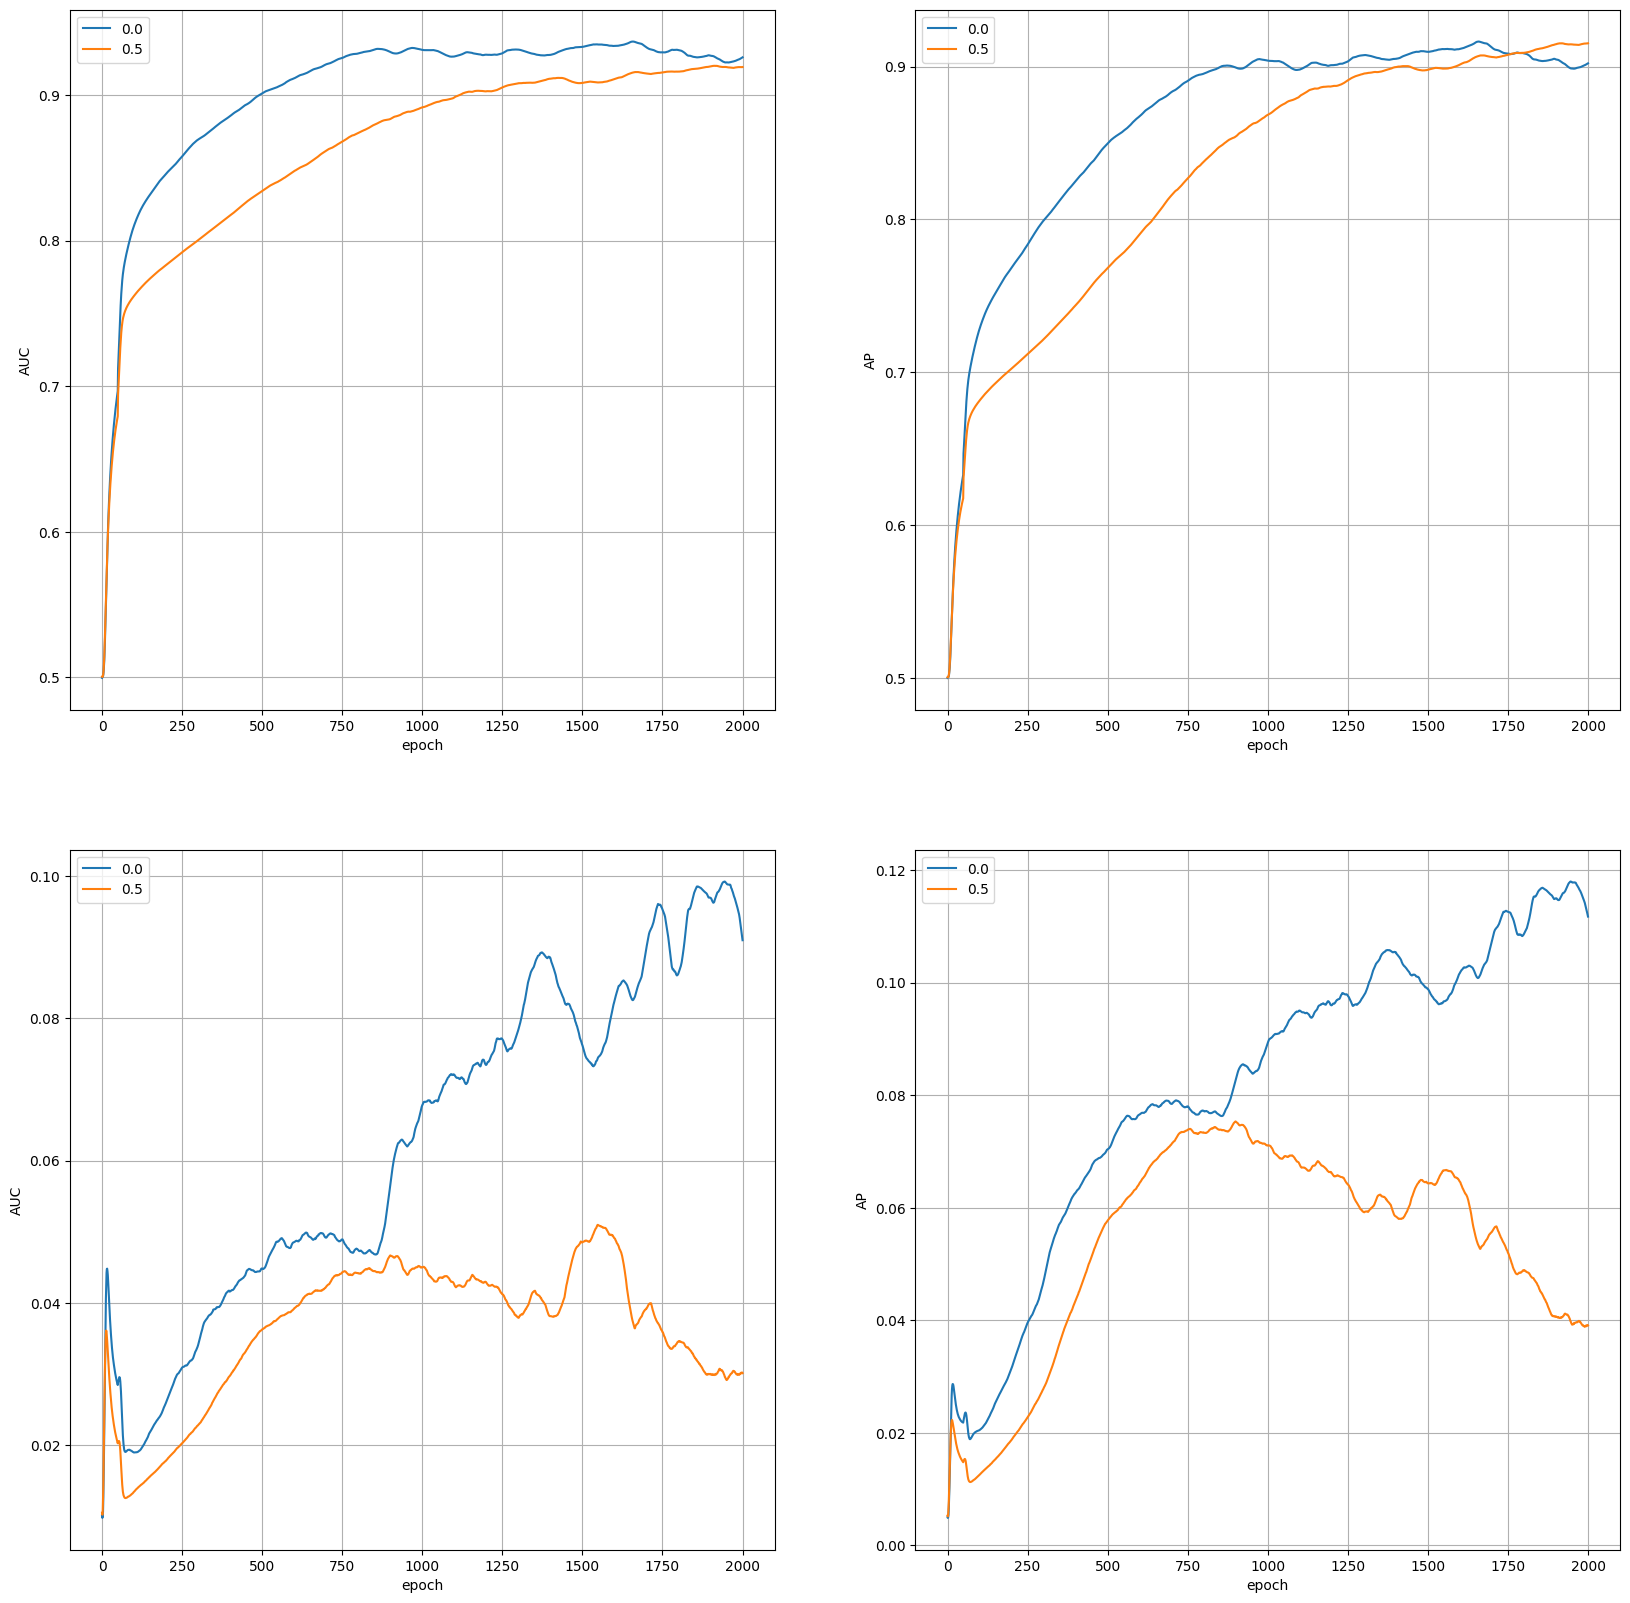

In [7]:
AUCs, APs = test_dropout("test_dropout/test.csv", data, [.0,.5],2000, test_interval= 1, n=200, average_on= 50)

In [48]:
mean_data = pd.read_csv("test_dropout/test1.csv", sep=";")
mean_data[["Dropout", "AUC", "AP", "elapsed_time"]] = mean_data[["Dropout", "AUC", "AP", "elapsed_time"]].applymap(lambda x: 0)

for i in range(10):
    df = pd.read_csv("test_dropout/test"+ str(i+1) + ".csv", sep=";")
    mean_data[["Dropout", "AUC", "AP", "elapsed_time"]] = mean_data[["Dropout", "AUC", "AP", "elapsed_time"]] + df[["Dropout", "AUC", "AP", "elapsed_time"]] / 10.0

mean_data[["Dropout"]] = mean_data[["Dropout"]].round(1)
mean_data.to_csv("test_dropout/mean.csv", sep=";", index=False)
mean_data

/tmp/ipykernel_87409/1360025467.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mean_data[["Dropout", "AUC", "AP", "elapsed_time"]] = mean_data[["Dropout", "AUC", "AP", "elapsed_time"]].applymap(lambda x: 0)


,Dropout,AUC,AP,epochs,elapsed_time
0,0.0,0.944674,0.929142,2000,42.126361
1,0.1,0.918398,0.906737,2000,41.715540
2,0.2,0.931087,0.932548,2000,41.847366
3,0.3,0.914220,0.918895,2000,41.685487
4,0.4,0.910201,0.913932,2000,41.578512
5,0.5,0.900713,0.904036,2000,41.639460
6,0.6,0.881984,0.882945,2000,41.636460
7,0.7,0.880589,0.882256,2000,41.681939


## Performance de notre Decodeur

In [2]:
def fit_vgae(model, optimizer, data, epochs, verbose=True):
    model.train()
    optimizer.zero_grad()
    z = model.encode(data.x, data.train_pos_edge_index)
    loss = model.recon_loss(z, data.train_pos_edge_index) + (1 / data.num_nodes) * model.kl_loss()
    loss.backward()
    optimizer.step()
        
def fit_gae(model, optimizer, data, epochs, verbose=True):
    model.train()
    optimizer.zero_grad()
    z = model.encode(data.x, data.train_pos_edge_index)
    loss = model.recon_loss(z, data.train_pos_edge_index)
    loss.backward()
    optimizer.step()

def test(file_path, data, epochs, n=10, type="vgae", encoder_out=32, decoder=True):
    f = open(file_path, "w")
    f.write("epoch;AUC;AP\n")
    for i in range(n):
        transform = RandomLinkSplit(is_undirected=True, split_labels=True, num_val=0)
        train_data, _, test_data = transform(data)
        dt = data.__copy__()
        dt.train_pos_edge_index = train_data.pos_edge_label_index
        dt.test_pos_edge_index = test_data.pos_edge_label_index
        dt.test_neg_edge_index = test_data.neg_edge_label_index
        
        # init model
        if type=="vgae":
            model = VGAE(Encoder(dt.num_features, encoder_out, dropout=0), Decoder(encoder_out) if decoder else None)
        elif type=="gae":
            model = GAE(GCN(dt.num_features, encoder_out), Decoder(encoder_out) if decoder else None)
        
        optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
        for j in range(epochs):
            if type=="vgae":
                fit_vgae(model, optimizer, dt, 1, verbose=False)
            elif type=="gae":
                fit_gae(model, optimizer, dt, 1, verbose=False)
            with torch.no_grad():
                model.eval()
                z = model.encode(dt.x, dt.train_pos_edge_index)
                result = model.test(z, dt.test_pos_edge_index, dt.test_neg_edge_index)
                model.train()
            f.write(str(j) + ";" + str(result[0]) + ";" + str(result[1]) + "\n")
            if j % 100 == 0 or j==epochs-1:
                print("n:", i, "epoch:", j, " : ", result, end=("\r" if j!=epochs-1 else "\n"))
    f.close()

In [4]:
# Reconstruction du graphe
G = nx.read_graphml("data/airportsAndCoordAndPop.graphml")
G.graph = {}
encoder = LabelEncoder()
encoder.fit([G.nodes[node]["country"] for node in G.nodes])

for node in G.nodes :
    G.nodes[node]["country_code"] = encoder.transform([G.nodes[node]["country"]])[0]
    G.nodes[node]["degree"] = G.degree()[node]

data = from_networkx(G, group_node_attrs=["lat", "lon", "country_code"])

In [5]:
test("test_performance/test_vgae_without_decoder.csv", data, 1000, n=10, type="vgae", encoder_out=32, decoder=False)
test("test_performance/test_vgae_with_decoder.csv", data, 1000, n=10, type="vgae", encoder_out=32, decoder=True)
test("test_performance/test_gae_without_decoder.csv", data, 1000, n=10, type="gae", encoder_out=32, decoder=False)
test("test_performance/test_gae_with_decoder.csv", data, 1000, n=10, type="gae", encoder_out=32, decoder=True)

amdgpu.ids: No such file or directory
amdgpu.ids: No such file or directory


n: 0 epoch: 999  :  (0.8108662169673269, 0.729649242199198))
n: 1 epoch: 999  :  (0.8360485351522978, 0.758438411522064))
n: 2 epoch: 999  :  (0.8218798446205796, 0.7412702635392041)
n: 3 epoch: 999  :  (0.8112961988673442, 0.7302424470636538)
n: 4 epoch: 999  :  (0.86081456599626, 0.7939596770973549)9)
n: 5 epoch: 999  :  (0.8338982168594058, 0.7587990943401287)
n: 6 epoch: 999  :  (0.8368098436217626, 0.7645474987559708)
n: 7 epoch: 999  :  (0.8282893070294239, 0.7524081609713085)
n: 8 epoch: 999  :  (0.8296613519513929, 0.7515231764487927)
n: 9 epoch: 999  :  (0.8387894227859203, 0.7643196458153323)
n: 0 epoch: 999  :  (0.9720244005700752, 0.9696851851530297)
n: 1 epoch: 999  :  (0.9784089266177396, 0.9741370148643694)
n: 2 epoch: 999  :  (0.9699692628688996, 0.9657379381387908)
n: 3 epoch: 999  :  (0.9480443420282201, 0.935104027962526))
n: 4 epoch: 999  :  (0.9750789004182087, 0.9717113414261287)
n: 5 epoch: 999  :  (0.9707591868348006, 0.968697834682619))
n: 6 epoch: 999  :  (0.9

AUC
VGAE with decoder :  0.9653505786666567
VGAE without decoder :  0.7780345337261559
GAE with decoder :  0.9720150937205201
GAE without decoder :  0.7380466190041507
AP
VGAE with decoder :  0.9634312980049982
VGAE without decoder :  0.6990749427770714
GAE with decoder :  0.9704511208609337
GAE without decoder :  0.6574720954441554


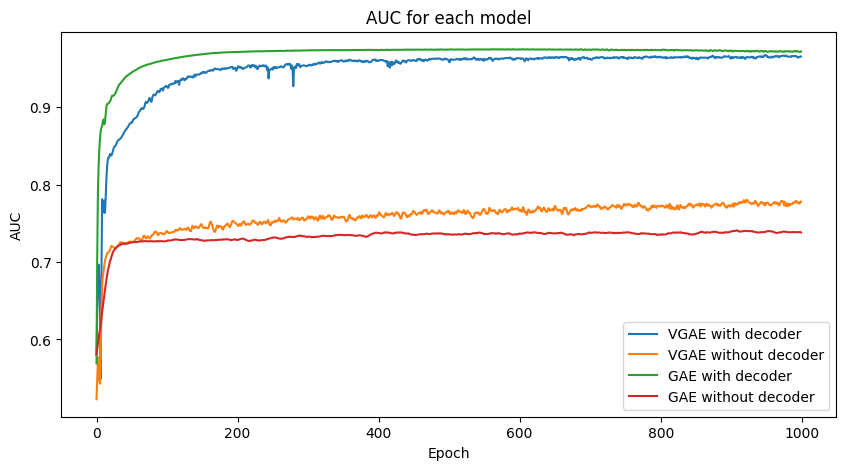

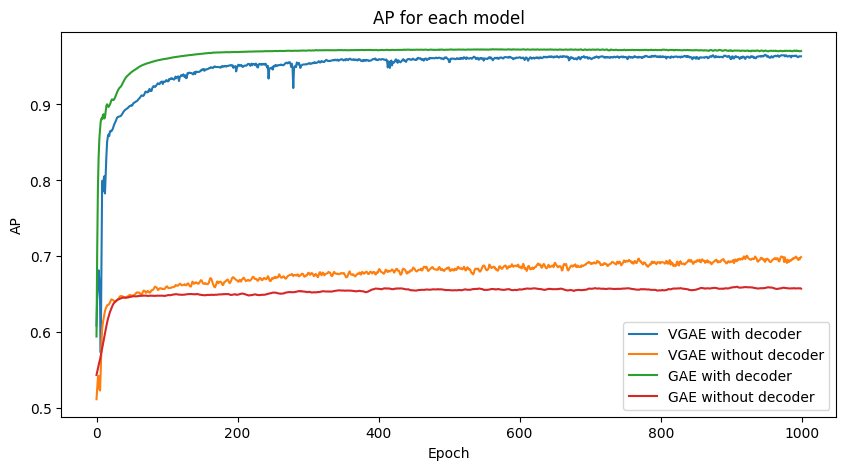

In [15]:
columns = ['epoch', 'AUC', 'AP']
subrepo = "avec_degre_0dropout/"
wd = pd.read_csv("test_performance/"+subrepo+"test_vgae_with_decoder.csv", sep=';', names=columns, skiprows=1)
wod = pd.read_csv("test_performance/"+subrepo+"test_vgae_without_decoder.csv", sep=';', names=columns, skiprows=1)
dgae_wd = pd.read_csv("test_performance/"+subrepo+"test_gae_with_decoder.csv", sep=';', names=columns, skiprows=1)
dgae_wod = pd.read_csv("test_performance/"+subrepo+"test_gae_without_decoder.csv", sep=';', names=columns, skiprows=1)

# Faire la moyenne des AUC et AP pour n=10 pour chaque epoch=1000
model1 = wd.groupby('epoch').agg({'AUC': 'mean', 'AP': 'mean'})
model2 = wod.groupby('epoch').agg({'AUC': 'mean', 'AP': 'mean'})
model3 = dgae_wd.groupby('epoch').agg({'AUC': 'mean', 'AP': 'mean'})
model4 = dgae_wod.groupby('epoch').agg({'AUC': 'mean', 'AP': 'mean'})

# Plot AUC
plt.figure(figsize=(10, 5))
plt.plot(model1["AUC"], label="VGAE with decoder")
plt.plot(model2["AUC"], label="VGAE without decoder")
plt.plot(model3["AUC"], label="GAE with decoder")
plt.plot(model4["AUC"], label="GAE without decoder")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.title("AUC for each model")
plt.savefig("test_performance/AUC.png", dpi=1000)

# Plot AP
plt.figure(figsize=(10, 5))
plt.plot(model1["AP"], label="VGAE with decoder")
plt.plot(model2["AP"], label="VGAE without decoder")
plt.plot(model3["AP"], label="GAE with decoder")
plt.plot(model4["AP"], label="GAE without decoder")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("AP")
plt.title("AP for each model")
plt.savefig("test_performance/AP.png", dpi=1000)

print("AUC")
print("VGAE with decoder : ", model1["AUC"][len(model1)-1])
print("VGAE without decoder : ", model2["AUC"][len(model2)-1])
print("GAE with decoder : ", model3["AUC"][len(model3)-1])
print("GAE without decoder : ", model4["AUC"][len(model4)-1])
print("AP")
print("VGAE with decoder : ", model1["AP"][len(model1)-1])
print("VGAE without decoder : ", model2["AP"][len(model2)-1])
print("GAE with decoder : ", model3["AP"][len(model3)-1])
print("GAE without decoder : ", model4["AP"][len(model4)-1])

## Reconstruction de graphe

In [ ]:
true_edges = G.edges
nodes_list = np.array(list(G.nodes()))

dt = data.__copy__()
# train_test_split_edges(dt, val_ratio=0.0)
transform = RandomLinkSplit(is_undirected=True, split_labels=True, num_val=0)
train_data, _, test_data = transform(data)
dt.train_pos_edge_index = train_data.pos_edge_label_index
dt.test_pos_edge_index = test_data.pos_edge_label_index
dt.test_neg_edge_index = test_data.neg_edge_label_index

In [34]:
encoder = Encoder(in_channels=dt.num_features, out_channels=15, dropout=0.3)
decoder = Decoder(15)

vgae = VGAE(encoder, decoder)
vgaeWithoutDecoder = VGAE(Encoder(in_channels=dt.num_features, out_channels=15, dropout=0.3))
gae = GAE(GCN(data.num_features, 15))

epochs = 1500

fit_vgae(vgae, dt, epochs, verbose=True)
fit_vgae(vgaeWithoutDecoder, dt, epochs, verbose=True)
fit_gae(gae, dt, epochs, verbose=True)

1500  :  (0.9642694647716668, 0.9623606066455852)
1500  :  (0.8423928632406832, 0.8196789559046127)
1500  :  (0.7436092398620406, 0.6627739319346279)


In [20]:
def predict_graph(data, model, G, edges_index, true_edges, sigmoid, file_path):
    print("> Predicting edges...")
    with torch.no_grad():
        model.eval()
        z = model.decoder(model.encode(data.x, data.train_pos_edge_index), edges_index, sigmoid=sigmoid)
    edges_transpose = torch.transpose(edges_index, 0, 1)

    print(len(z), " possible edges")
    print('Prediction min(%.5f) and max(%.5f)' % (torch.min(z).item(), torch.max(z).item()))
    print("Prediction mean(%.5f) and std(%.5f)" % (torch.mean(z).item(), torch.std(z).item()))

    #---
    print("> Selecting edges...")
    threshold = torch.quantile(z, 0.5)#max(1 - len(true_edges) / edges_transpose.shape[0], 0), interpolation='nearest')
    print("Threshold : ", threshold.item())
    G.clear_edges()
    rejected_edges = 0
    for i in range(edges_transpose.shape[0]):
        source, target = edges_transpose[i]
        edge = (nodes_list[source.item()], nodes_list[target.item()])
        if z[i] >= threshold :
            G.add_edge(*edge, color = 'black' if edge in true_edges else 'r')
        elif edge in true_edges :
            G.add_edge(*edge, color = 'g')
        else :
            rejected_edges += 1
        
        if i % 100 == 0:
            print(i, ' / ', edges_transpose.shape[0], end="\r")

    count = {'black':0, 'r':0, 'g':0}
    color = nx.get_edge_attributes(G,'color')
    for edge in G.edges:
        count[color[edge]] += 1
    print(count['black'], " correctly predicted")
    print(count['r'], " wrongly predicted")
    print(count['g'], " missed")
    print(rejected_edges, " rejected")

    #---
    print("> Printing...")
    node_positions = {}
    labels = {}
    for node, data in G.nodes(data=True):
        try:
            node_positions[node] = (data['lon'], data['lat'])
            labels[node] = (data['city_name'])
        except:
            node_positions[node] = (0,0)
            labels[node] = ('unknown')

    # Tracez le graphe
    nx.draw_networkx_edges
    nx.draw(G, pos=node_positions, with_labels=True, labels=labels, font_size=1, node_size=10, width = 0.05, edge_color=nx.get_edge_attributes(G,'color').values())

    plt.savefig(file_path, dpi=1000)

    return z

In [21]:
edge_index_combinations = torch.cat((train_data.pos_edge_label_index, train_data.neg_edge_label_index, test_data.pos_edge_label_index, test_data.neg_edge_label_index), dim=1)
# Shuffle
edge_index_combinations = edge_index_combinations[:, torch.randperm(edge_index_combinations.shape[1])]

> Predicting edges...
27094  possible edges
Prediction min(0.00000) and max(1.00000)
Prediction mean(0.51289) and std(0.43108)
> Selecting edges...
Threshold :  0.5917894840240479
12535  correctly predicted
1011  wrongly predicted
1012  missed
12535  rejected
> Printing...


tensor([0.9960, 0.8846, 0.0316,  ..., 0.9984, 0.8923, 0.9746])

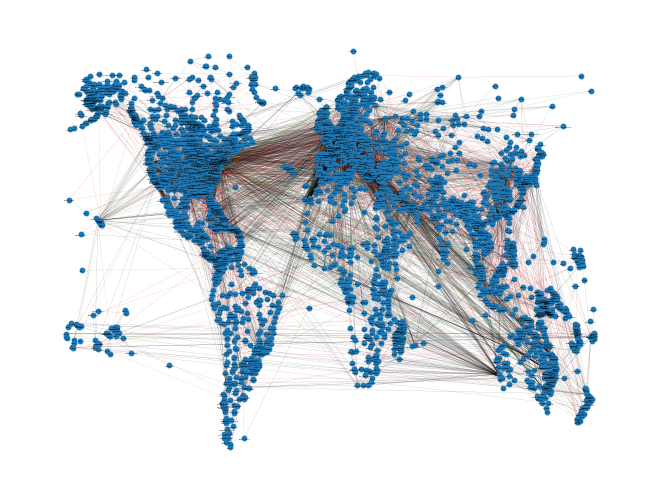

In [22]:
predict_graph(dt, vgae, G.copy(), edge_index_combinations, true_edges, True, "withDecoder.png")

> Predicting edges...
27094  possible edges
Prediction min(0.00000) and max(1.00000)
Prediction mean(0.75625) and std(0.41074)
> Selecting edges...
Threshold :  1.0
11665  correctly predicted
3995  wrongly predicted
1882  missed
9545  rejected
> Printing...


tensor([1.0000, 0.9999, 1.0000,  ..., 1.0000, 1.0000, 1.0000])

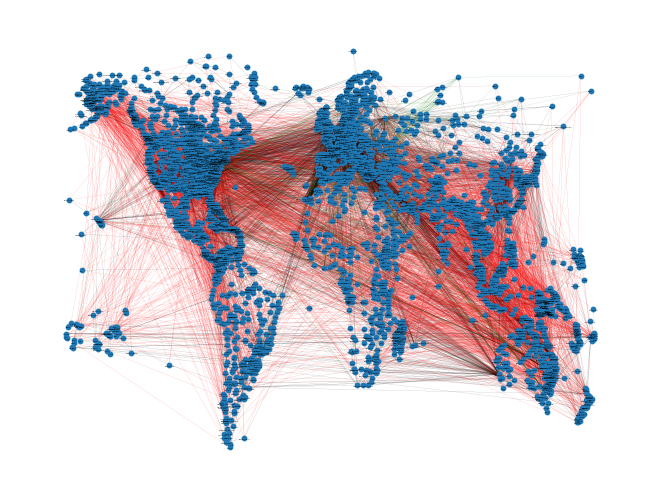

In [23]:
predict_graph(dt, vgaeWithoutDecoder, G.copy(), edge_index_combinations, true_edges, True, "withoutDecoder.png")

> Predicting edges...
27094  possible edges
Prediction min(0.00000) and max(1.00000)
Prediction mean(0.73815) and std(0.43963)
> Selecting edges...
Threshold :  1.0
13239  correctly predicted
6745  wrongly predicted
308  missed
6797  rejected
> Printing...


tensor([1., 1., 1.,  ..., 1., 1., 1.])

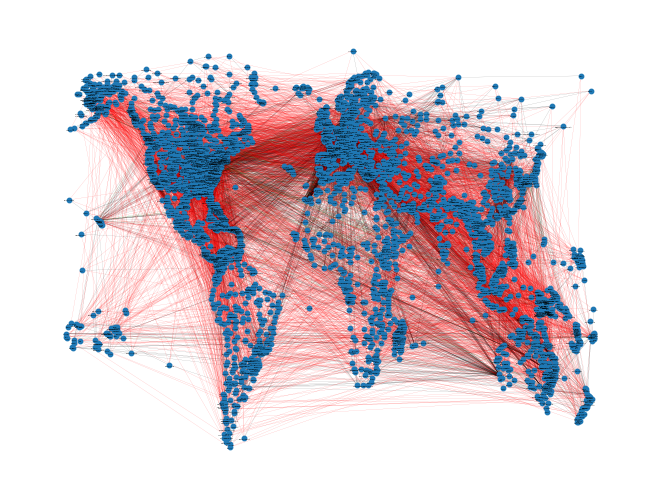

In [24]:
predict_graph(dt, gae, G.copy(), edge_index_combinations, true_edges, True, "GCN.png")